In [0]:
#!unzip air-pollution-in-seoul.zip

In [32]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [34]:
# Retriving data for station code 105 for PM2.5
data_105=data[(data['Station code']==105) & (data['PM2.5']>0)]
print(len(data_105))
print(data_105.head(10))

24697
        Measurement date  Station code  ...  PM10  PM2.5
103610  2017-01-01 00:00           105  ...  81.0   44.0
103611  2017-01-01 01:00           105  ...  67.0   44.0
103612  2017-01-01 02:00           105  ...  84.0   43.0
103613  2017-01-01 03:00           105  ...  85.0   42.0
103614  2017-01-01 04:00           105  ...  79.0   35.0
103615  2017-01-01 05:00           105  ...  72.0   38.0
103616  2017-01-01 06:00           105  ...  70.0   38.0
103617  2017-01-01 07:00           105  ...  76.0   48.0
103618  2017-01-01 08:00           105  ...  87.0   44.0
103619  2017-01-01 09:00           105  ...  80.0   46.0

[10 rows x 11 columns]


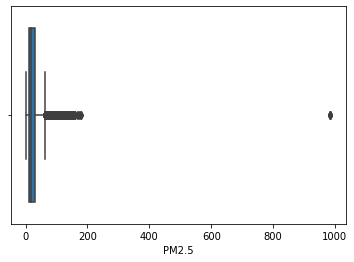

In [35]:
import seaborn as sns
sns.boxplot(data_105['PM2.5'])

24523


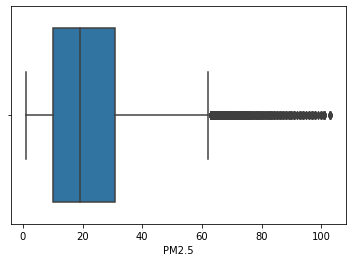

In [36]:
from scipy import stats
z = np.abs(stats.zscore(data_105['PM2.5']))
threshold = 3
#print(len(np.where(z > 3)))
data_105_Rout = data_105[(z < 3)]
print(len(data_105_Rout))
sns.boxplot(data_105_Rout['PM2.5'])

In [37]:
df=data_105_Rout['PM2.5']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(24523, 1)


In [38]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[1.] [103.]
24523
0.0 1.0


In [39]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


24518 [0.4215686274509804, 0.4215686274509804, 0.4117647058823529, 0.40196078431372545, 0.3333333333333333]


In [40]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(24518, 5)


,x1,x2,x3,x4,y
0,0.421569,0.421569,0.411765,0.401961,0.333333
1,0.421569,0.411765,0.401961,0.333333,0.362745
2,0.411765,0.401961,0.333333,0.362745,0.362745
3,0.401961,0.333333,0.362745,0.362745,0.460784
4,0.333333,0.362745,0.362745,0.460784,0.421569
5,0.362745,0.362745,0.460784,0.421569,0.441176
6,0.362745,0.460784,0.421569,0.441176,0.500000
7,0.460784,0.421569,0.441176,0.500000,0.450980
8,0.421569,0.441176,0.500000,0.450980,0.470588
9,0.441176,0.500000,0.450980,0.470588,0.519608


In [41]:
print(matrix[:,4])

[[0.33333333]
 [0.3627451 ]
 [0.3627451 ]
 ...
 [0.08823529]
 [0.10784314]
 [0.1372549 ]]


In [42]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8091, 1) [[0.27265197]
 [0.161374  ]
 [0.21444692]
 [0.06590355]
 [0.10553744]]


In [43]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8747599223827767
[0.01092281]
[[ 0.0452345  -0.00158742  0.0837658   0.82122064]]


In [44]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.0036876736317906014
absolute mean error :  0.04080181161051038
0.8726026259640236


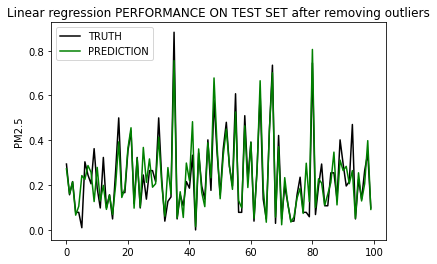

In [45]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

(24697, 1)
[1.] [985.]
24697
0.0 1.0000000000000002
24692 [0.04369918699186993, 0.04369918699186993, 0.042682926829268296, 0.04166666666666667, 0.03455284552845529]
(8149, 1) [[0.00832975]
 [0.00984595]
 [0.02231337]
 [0.02318093]
 [0.00997169]]
mean squared eror :  0.00026279932068886644
absolute mean error :  0.006151952604538325
0.4705322741022804


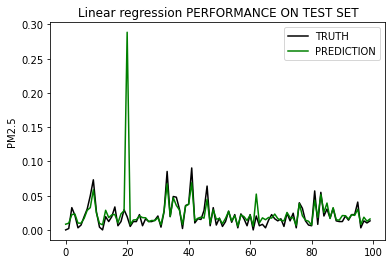

In [46]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_105['PM2.5']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [47]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0002627609969579497
absolute mean error :  0.006154903178991424
0.4706094857883807


In [48]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0002455366702391966
absolute mean error :  0.004915342859432089
0.5053117257865372


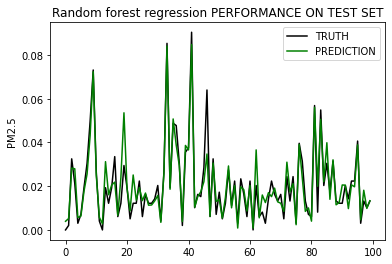

truth :  [[0.        ]
 [0.00203252]
 [0.03252033]
 [0.02134146]
 [0.00304878]
 [0.00711382]
 [0.01930894]
 [0.0304878 ]
 [0.04979675]
 [0.07317073]]
prediction :  [0.00394786 0.00520239 0.02829137 0.02797453 0.0056914  0.00631138
 0.01769406 0.02558304 0.0431181  0.07237726]


In [49]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [50]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0002607762979657747
0.006353917901814861
0.4746081036661739


In [51]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.00048583773085413885
absolute mean error :  0.004835440662251857
0.021171752513030384


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


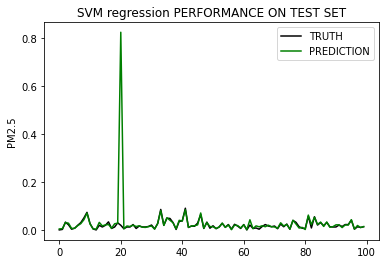

In [52]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [53]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
16543/16543 [==============================] - 2s 91us/step - loss: 0.0014 - accuracy: 0.0241
Epoch 2/100
16543/16543 [==============================] - 1s 84us/step - loss: 0.0014 - accuracy: 0.0241
Epoch 3/100
16543/16543 [==============================] - 1s 85us/step - loss: 0.0014 - accuracy: 0.0241
Epoch 4/100
16543/16543 [==============================] - 1s 84us/step - loss: 0.0014 - accuracy: 0.0241
Epoch 5/100
16543/16543 [==============================] - 1s 84us/step - loss: 0.0014 - accuracy: 0.0241
Epoch 6/100
16543/16543 [==============================] - 1s 85us/step - loss: 0.0014 - accuracy: 0.0241
Epoch 7/100
16543/16543 [==============================] - 1s 84us/step - loss: 0.0014 - accuracy: 0.0241
Epoch 8/100
16543/16543 [==============================] - 1s 84us/step - loss: 0.0014 - accuracy: 0.0241
Epoch 9/100
16543/16543 [==============================] - 1s 86us/step - loss: 0.0014 - accuracy: 0.0241
Epoch 10/100
16543/16543 [====================

dict_keys(['loss', 'accuracy'])


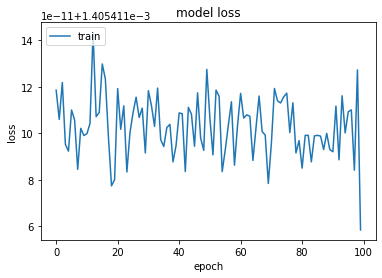

mean squared error :  0.0010239063688633951
mean absolute error :  0.004835440662251857
0.021171752513030384


In [54]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


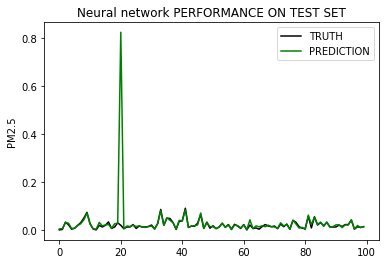

In [55]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [56]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.0254065  0.02743902 0.0304878  0.0304878 ]
 [0.         0.00101626 0.00101626 0.00101626]
 [0.0101626  0.01117886 0.00914634 0.01422764]
 ...
 [0.05792683 0.09756098 0.09247967 0.07520325]
 [0.01422764 0.01117886 0.0101626  0.00711382]
 [0.00304878 0.0050813  0.00304878 0.        ]]
(16543, 4)
(16543, 4, 1)


In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
16543/16543 [==============================] - 18s 1ms/step - loss: 6.7366e-04
Epoch 2/100
16543/16543 [==============================] - 17s 1ms/step - loss: 5.9870e-04
Epoch 3/100
16543/16543 [==============================] - 17s 1ms/step - loss: 5.8062e-04
Epoch 4/100
16543/16543 [==============================] - 16s 984us/step - loss: 5.7056e-04
Epoch 5/100
16543/16543 [==============================] - 16s 976us/step - loss: 5.5501e-04
Epoch 6/100
16543/16543 [==============================] - 16s 984us/step - loss: 5.4336e-04
Epoch 7/100
16543/16543 [==============================] - 16s 976us/step - loss: 5.2696e-04
Epoch 8/100
16543/16543 [==============================] - 16s 969us/step - loss: 5.2027e-04
Epoch 9/100
16543/16543 [==============================] - 16s 966us/step - loss: 5.1931e-04
Epoch 10/100
16543/16543 [==============================] - 16s 972us/step - loss: 5.1933e-04
Epoch 11/100
16543/16543 [==============================] - 16s 977us/step 

dict_keys(['loss'])


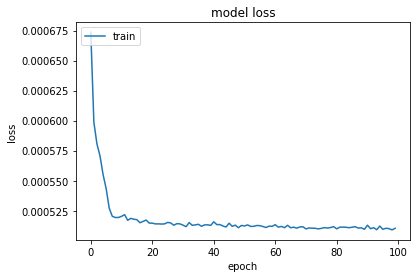

mean square error : 0.00016037168130612968
mean absolute error :  0.004371579878287073
0.6768955521765638


In [58]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

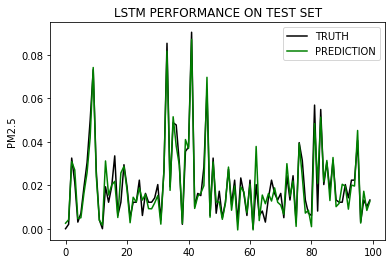

In [59]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()